In [451]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.testing as tm

In [452]:
#ML Packages
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


from numpy import mean
from numpy import std

In [453]:
data = pd.read_csv("breast-cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [454]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [455]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [456]:
#check jika ada missing value
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [457]:
data.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [458]:
data.values

array([[842302, 'M', 17.99, ..., 0.2654, 0.4601, 0.1189],
       [842517, 'M', 20.57, ..., 0.186, 0.275, 0.08902],
       [84300903, 'M', 19.69, ..., 0.243, 0.3613, 0.08758],
       ...,
       [926954, 'M', 16.6, ..., 0.1418, 0.2218, 0.0782],
       [927241, 'M', 20.6, ..., 0.265, 0.4087, 0.124],
       [92751, 'B', 7.76, ..., 0.0, 0.2871, 0.07039]], dtype=object)

In [459]:
data.shape

(569, 32)

In [460]:
#target distribusi
print(data.groupby('diagnosis').size())

diagnosis
B    357
M    212
dtype: int64


In [461]:

features = data.columns

for i in features:
    print("{} is unique: {}".format(i, data[i].is_unique))

id is unique: True
diagnosis is unique: False
radius_mean is unique: False
texture_mean is unique: False
perimeter_mean is unique: False
area_mean is unique: False
smoothness_mean is unique: False
compactness_mean is unique: False
concavity_mean is unique: False
concave points_mean is unique: False
symmetry_mean is unique: False
fractal_dimension_mean is unique: False
radius_se is unique: False
texture_se is unique: False
perimeter_se is unique: False
area_se is unique: False
smoothness_se is unique: False
compactness_se is unique: False
concavity_se is unique: False
concave points_se is unique: False
symmetry_se is unique: False
fractal_dimension_se is unique: False
radius_worst is unique: False
texture_worst is unique: False
perimeter_worst is unique: False
area_worst is unique: False
smoothness_worst is unique: False
compactness_worst is unique: False
concavity_worst is unique: False
concave points_worst is unique: False
symmetry_worst is unique: False
fractal_dimension_worst is uni

In [462]:

print(features)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [463]:
label = data.diagnosis

model_data = data.copy

In [464]:
updated_data = data.drop(["id", "diagnosis"], axis=1)

model_data = updated_data.copy
model_data()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [465]:
updated_data.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [466]:

data_std = (updated_data - updated_data.mean()) / (updated_data.std())
data_std.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.311195e-16,6.243785e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.998011e-16,3.746271e-17,-4.995028e-17,1.748260e-16,4.838933e-16,...,-8.241796e-16,1.248757e-17,-3.496520e-16,0.000000,-2.122887e-16,-3.621395e-16,8.741299e-17,2.122887e-16,2.622390e-16,-5.744282e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.027864e+00,-2.227289e+00,-1.982759e+00,-1.453164e+00,-3.109349e+00,-1.608721e+00,-1.113893e+00,-1.260710e+00,-2.741705e+00,-1.818265e+00,...,-1.725382e+00,-2.222039e+00,-1.691872e+00,-1.221348,-2.680337e+00,-1.442609e+00,-1.304683e+00,-1.743529e+00,-2.159060e+00,-1.600431e+00
25%,-6.887793e-01,-7.253249e-01,-6.913472e-01,-6.666089e-01,-7.103378e-01,-7.464292e-01,-7.430941e-01,-7.372951e-01,-7.026215e-01,-7.220040e-01,...,-6.743279e-01,-7.479711e-01,-6.889721e-01,-0.641571,-6.906227e-01,-6.804845e-01,-7.558491e-01,-7.557349e-01,-6.412994e-01,-6.913035e-01
50%,-2.148925e-01,-1.045442e-01,-2.357726e-01,-2.949274e-01,-3.486040e-02,-2.217454e-01,-3.419391e-01,-3.973715e-01,-7.156354e-02,-1.781226e-01,...,-2.688030e-01,-4.347738e-02,-2.857288e-01,-0.340881,-4.680159e-02,-2.692639e-01,-2.180402e-01,-2.232725e-01,-1.272975e-01,-2.162538e-01
75%,4.689800e-01,5.836621e-01,4.992377e-01,3.631877e-01,6.356397e-01,4.934227e-01,5.255994e-01,6.463664e-01,5.303125e-01,4.705693e-01,...,5.215568e-01,6.577623e-01,5.398040e-01,0.357275,5.970195e-01,5.391944e-01,5.306742e-01,7.118836e-01,4.497425e-01,4.503661e-01
max,3.967796e+00,4.647799e+00,3.972634e+00,5.245913e+00,4.766717e+00,4.564409e+00,4.239858e+00,3.924477e+00,4.480808e+00,4.906602e+00,...,4.090590e+00,3.882489e+00,4.283568e+00,5.924959,3.951897e+00,5.108382e+00,4.696536e+00,2.683516e+00,6.040726e+00,6.840837e+00


In [467]:

data_norm = (updated_data - updated_data.min()) / (updated_data.max() - updated_data.min())
data_norm.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


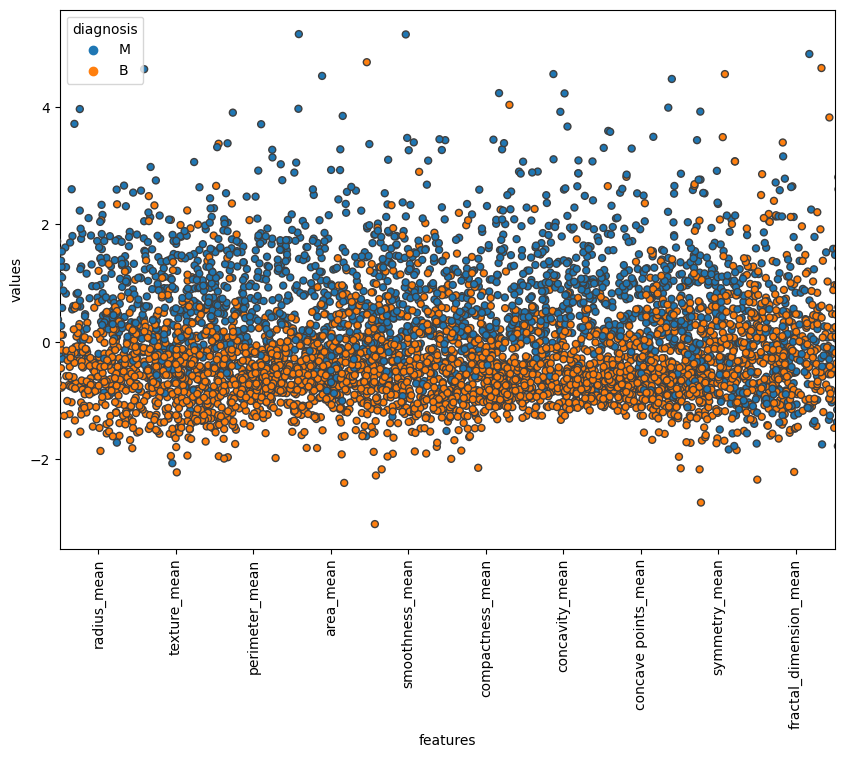

In [468]:
# strip plot is easy to clear variance among the data
# we consider first 10 features
new_data = pd.concat([label, data_std.iloc[:,0:10]], axis=1)

# use melt() funciton to massage a dataframe in to a format where one or more columns are identifier_vars, and others are measure_vars
new_data = pd.melt(new_data, id_vars="diagnosis", var_name="features", value_name="values")

# use stripplot
plt.figure(figsize=(10,7))
data = sns.stripplot(x="features", y="values", hue="diagnosis", data=new_data, jitter=1, linewidth=1)
plt.xticks(rotation=90)
plt.show();

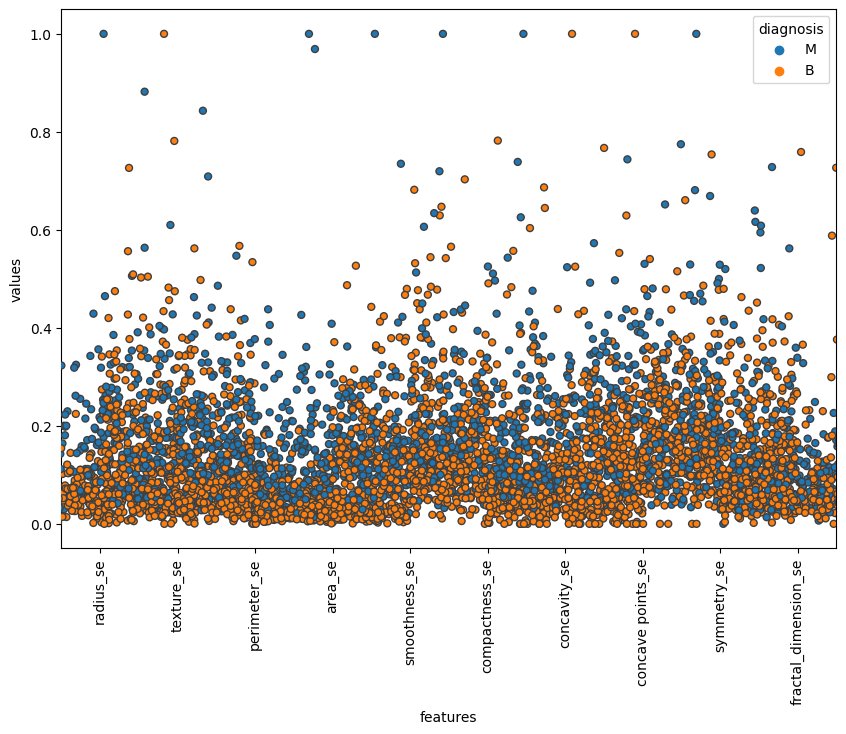

In [469]:
# Now, we consider second 10 features.
new_data = pd.concat([label, data_norm.iloc[:,10:20]], axis=1)

# use melt() funciton to massage a dataframe in to a format where one or more columns are identifier_vars, and others are measure_vars
new_data = pd.melt(new_data, id_vars="diagnosis", var_name="features", value_name="values")

# use stripplot
plt.figure(figsize=(10,7))
data = sns.stripplot(x="features", y="values", hue="diagnosis", data=new_data, jitter=1, linewidth=1)
plt.xticks(rotation=90)
plt.legend(loc='upper right', title="diagnosis")
plt.show();

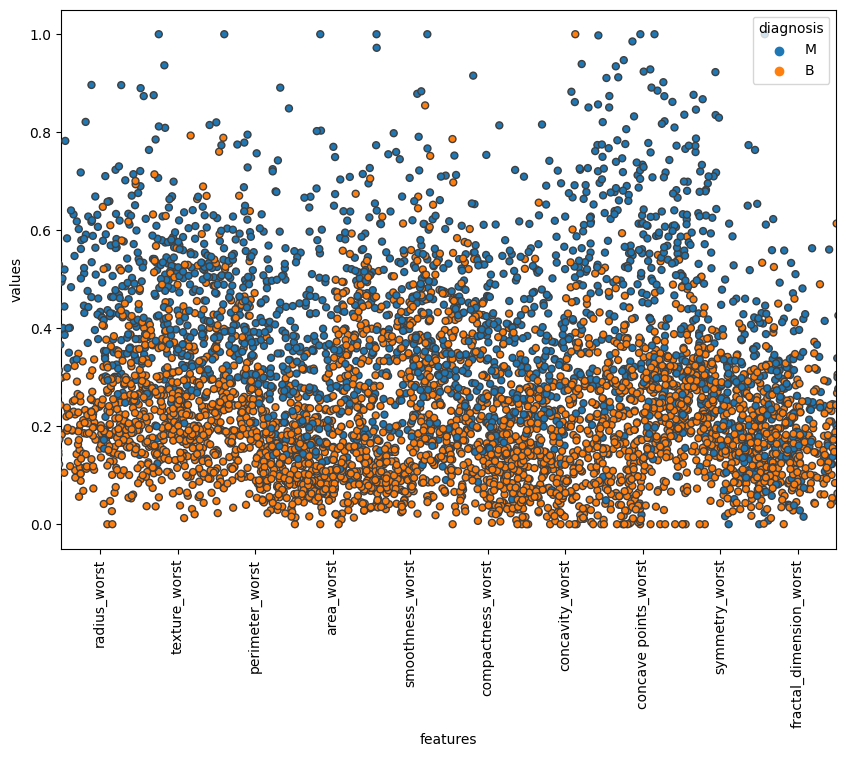

In [470]:
# Now, we consider third 10 features.
new_data = pd.concat([label, data_norm.iloc[:,20:30]], axis=1)

# use melt() funciton to massage a dataframe in to a format where one or more columns are identifier_vars, and others are measure_vars
new_data = pd.melt(new_data, id_vars="diagnosis", var_name="features", value_name="values")

# use stripplot
plt.figure(figsize=(10,7))
data = sns.stripplot(x="features", y="values", hue="diagnosis", data=new_data, jitter=1, linewidth=1)
plt.xticks(rotation=90)
plt.legend(loc='upper right', title="diagnosis")
plt.show();

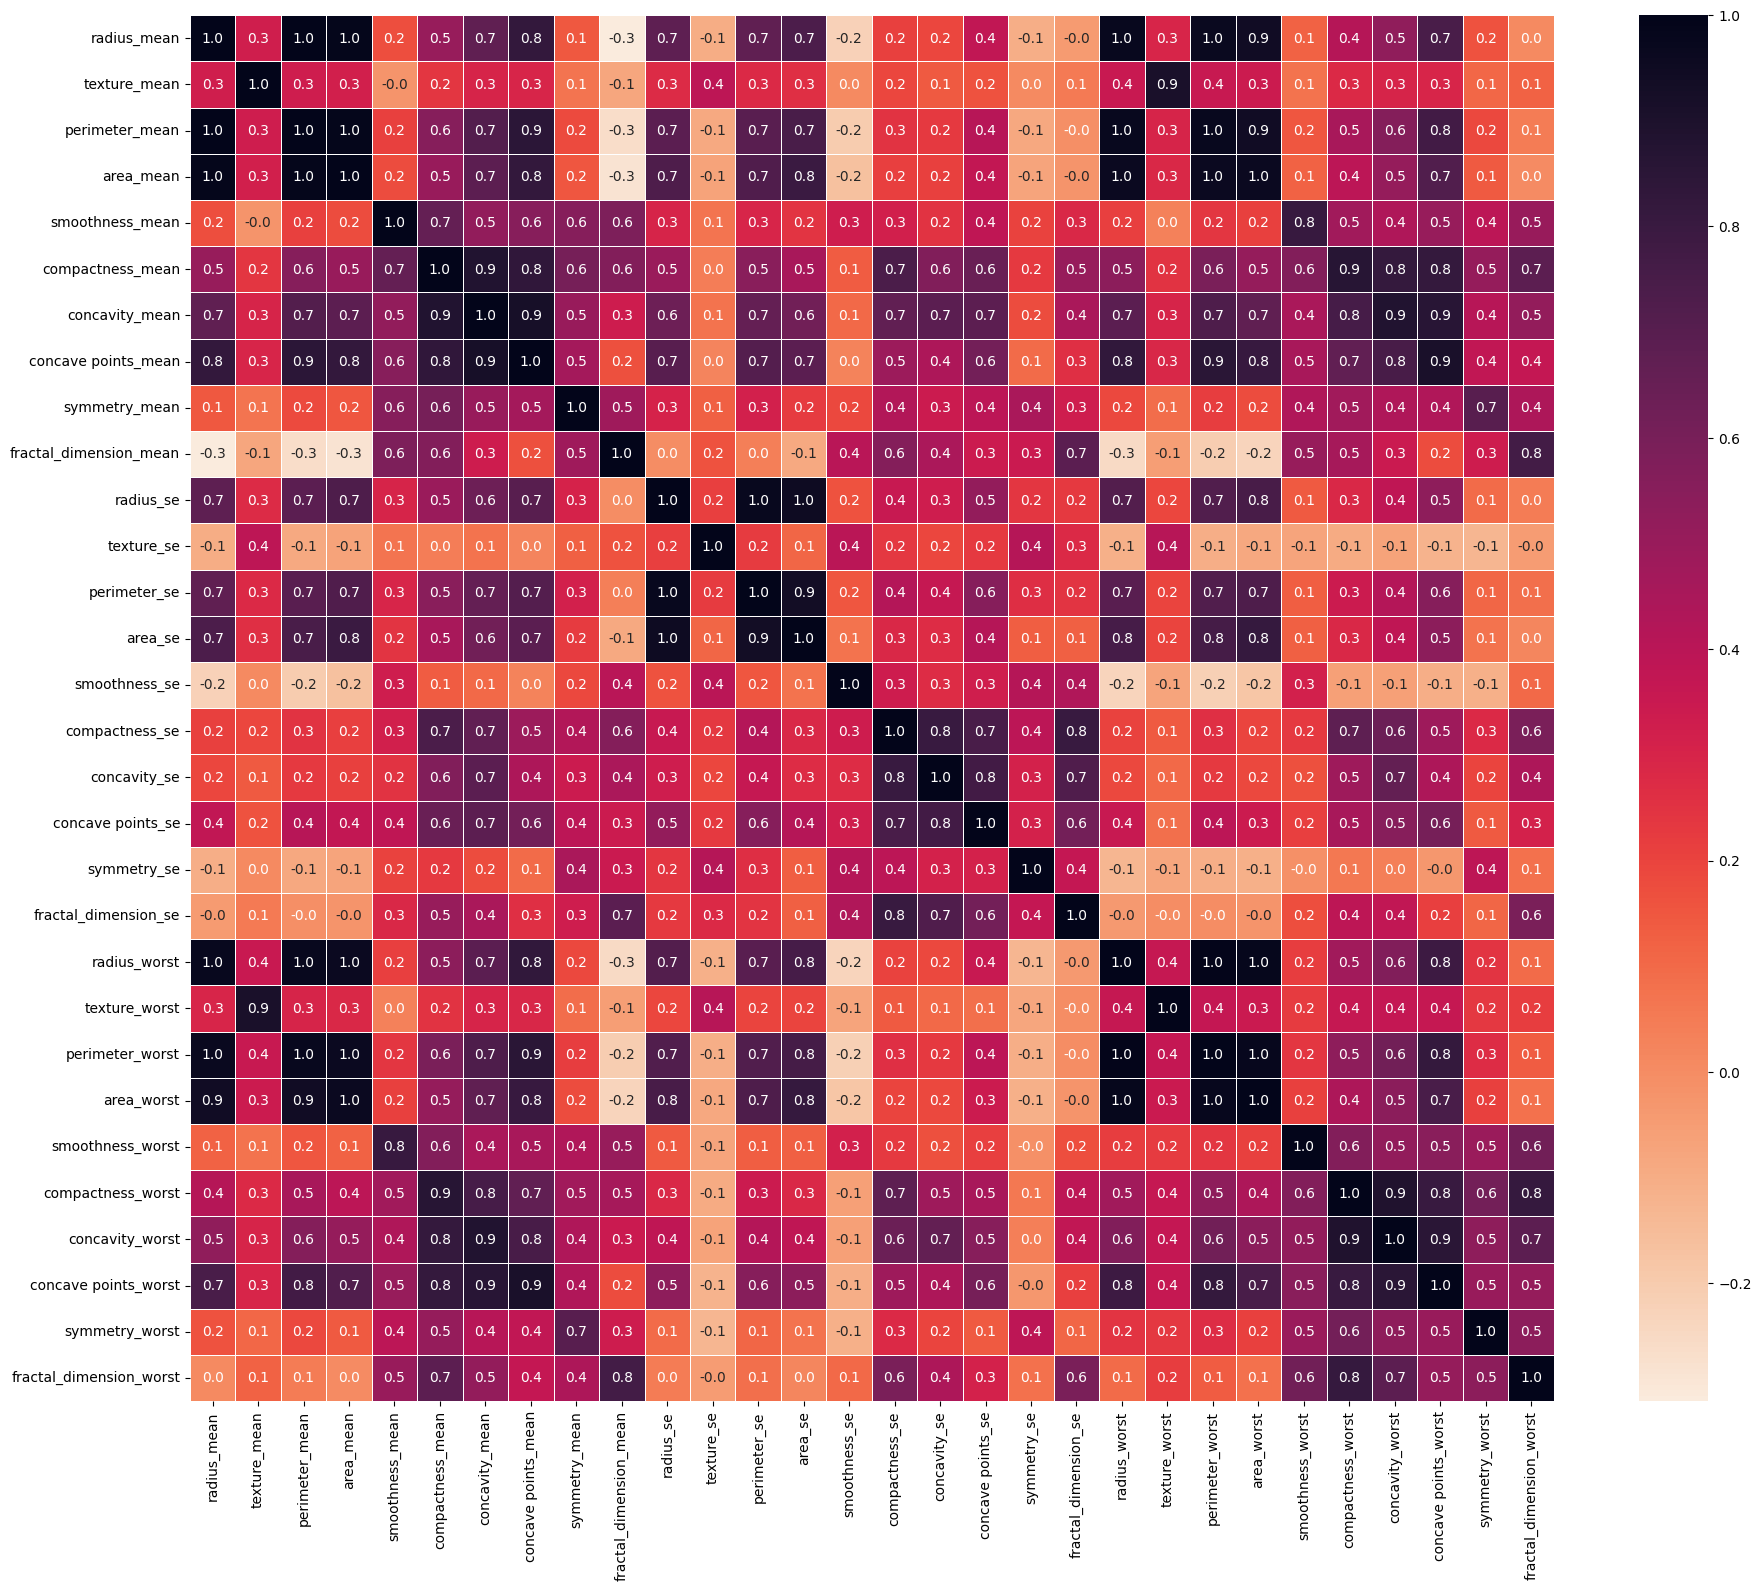

In [471]:
# correlation map or heat map
f,ax = plt.subplots(figsize=(22,18))

sns.heatmap(data = updated_data.corr(), annot=True, cmap="rocket_r", fmt = ".1f", linewidth=0.5, ax=ax)
plt.show();

In [472]:
drop_corr_lst = ["radius_mean", "perimeter_mean", "compactness_mean", "concave points_mean", "radius_se", "perimeter_se", "compactness_se", "concave points_se", "radius_worst", "perimeter_worst","area_worst", "concavity_worst", "concave points_worst"]
selected_features = updated_data.drop(drop_corr_lst, axis=1)

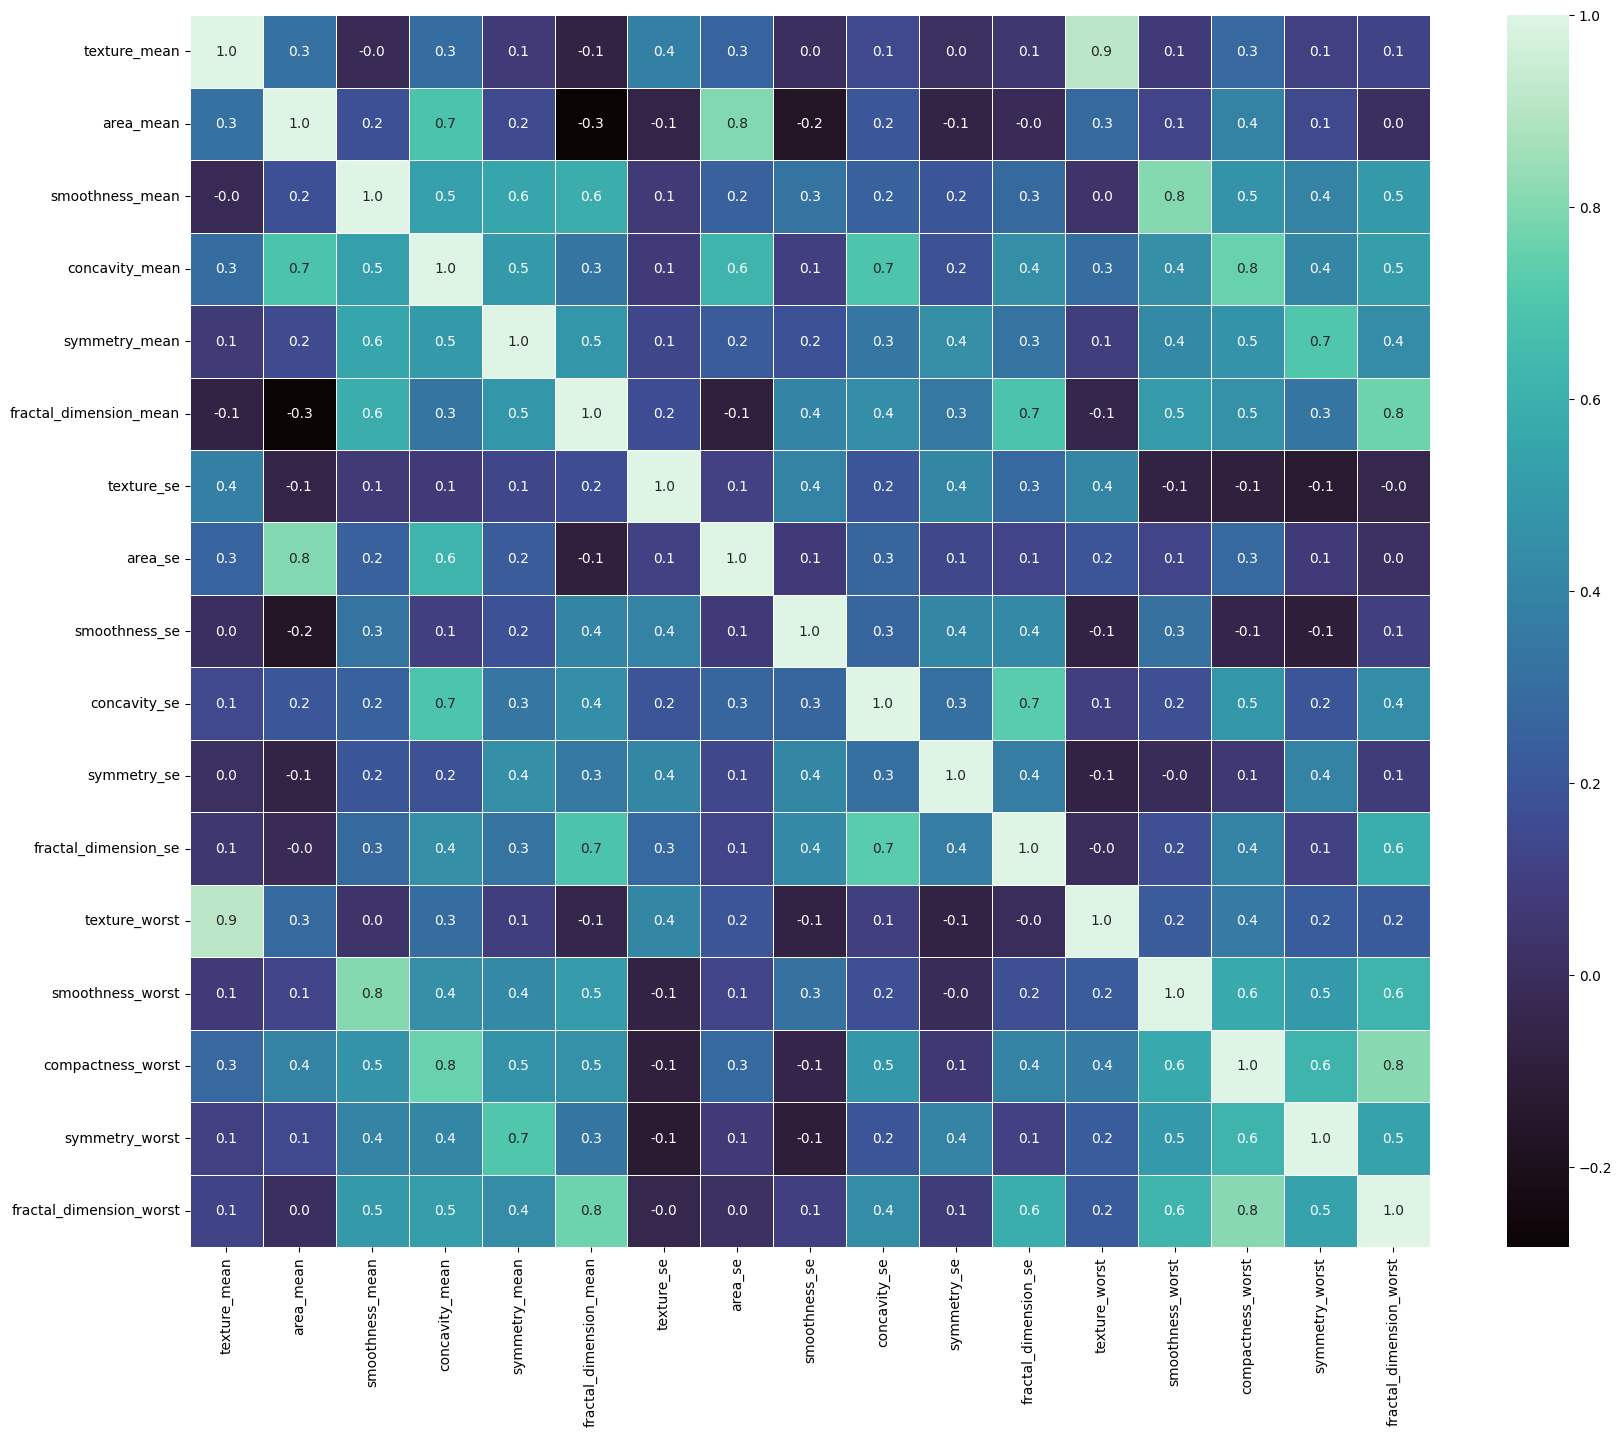

In [473]:
# correlation map or heat map after selecting new features
f,ax = plt.subplots(figsize=(20,16))

sns.heatmap(data = selected_features.corr(), annot=True, cmap="mako", fmt = ".1f", linewidth=0.5, ax=ax)
plt.show();

In [474]:
# LoadData routine is used to read dataset and create training and testing datasets
def LoadData():
    
    global feature_names, response_name, n_features, model_data 
    model_data = pd.read_csv('breast-cancer.csv')
        
    # we change the class values from B to 0 and from M to 1
    model_data.iloc[:,1].replace('B', 0,inplace=True)
    model_data.iloc[:,1].replace('M', 1,inplace=True)
    response_name = ['diagnosis']
    drop_list = ['id','diagnosis']
    model_data_new = model_data.drop(drop_list,axis = 1)
    X = model_data_new
    y = model_data.diagnosis
    
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size = 0.3,
                                                        random_state = 12345)
    return X_train, y_train, X_test, y_test

In [475]:
# take the 10 features that has applied feature selection medthods
fs = ['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'texture_se', 'area_se', 'texture_worst', 'smoothness_worst',
       'compactness_worst', 'symmetry_worst']

In [476]:
# take new variable and store it in the function
x_train, y_train, x_test, y_test = LoadData()

In [478]:
# store these selected features in the X_train and X_test
X_train = x_train[fs]
X_test = x_test[fs]

In [479]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()


# training the model on training data
clf.fit(X_train, y_train)


DecisionTreeRegressor()

In [480]:
# Evaluate the model
# import accuracy score

from sklearn.metrics import accuracy_score

# predict the training data without giving label
prediction_on_training_data = clf.predict(X_train)

# checks the accuracy score with the target value and prediction_on_training_data.
# accuracy score compares both of them and gives % of how much data it can predict correctly.

accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)
print("Accuracy on training data: ", accuracy_on_training_data)

Accuracy on training data:  1.0


In [481]:
# prediction on test_data
prediction_on_test_data = clf.predict(X_test)

# accuracy on test data
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)
print("Accuracy on test data: ", accuracy_on_test_data)

Accuracy on test data:  0.9005847953216374


In [482]:
# check the confusion_matrix and classification_report
# import necessary dependencies
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Confusion Matrix : \n\n" , confusion_matrix(prediction_on_test_data,y_test))

print("Classification Report : \n\n" , classification_report(prediction_on_test_data,y_test),"\n")

Confusion Matrix : 

 [[102   8]
 [  9  52]]
Classification Report : 

               precision    recall  f1-score   support

         0.0       0.92      0.93      0.92       110
         1.0       0.87      0.85      0.86        61

    accuracy                           0.90       171
   macro avg       0.89      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171
 



In [483]:
# store this model in pickle file uisng clf 
import pickle

pickle.dump(clf, open('tree_model.pkl', 'wb'))

model = pickle.load(open('tree_model.pkl', 'rb'))
print(model)

DecisionTreeRegressor()
